# Plotting with Seaborn - Exercise

This exercise deals with the seaborn package which we will use to create plots for the *Data Exploration Tasks*.
Seaborn is a nice library to produce plots very quickly. However, customization of the generated plots requires knowledge about the underlying matplotlib library, which is beyond the scope of this course.

For this exercise we will use two different datasets: the **house price** data set and the **titanic** data set which we will use for **regression** and **classification** tasks, respectively, in the following exercises.

As always, we start by importing the necessary libraries:

In [1]:
# Load standard packages
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

# To show plots directly in jupyter
%matplotlib inline

# Set default figure and font size for all plots
matplotlib.rcParams['figure.figsize'] = (12.0, 9.0)
matplotlib.rcParams.update({'font.size': 12})

## 1. House Price Dataset
In this part of the exercise we analyze the famous **Ames Housing data from Dean De Cock**. It contains 79 features to predict house prices. It can be thought of as a complex version of the famous boston dataset, which is widely used for regression tasks but which only includes numerical features. For further details you may have a look at http://ww2.amstat.org/publications/jse/v19n3/decock.pdf and https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt.

Please load the dataset from the path **'data/houses.csv'** as a dataframe called **houses**. 
Before we start creating plots, please **answer the following questions**:

- how many rows and columns does the dataset hold?
- how many numerical and non-numerical (categorical) variables?
- which feature includes the most null values?

In [18]:
houses.isnull().sum().idxmax()
#.idxmax()

'PoolQC'

In [4]:
houses = pd.read_csv('data/houses.csv')
#houses = pd.read_csv('data/houses.csv')
test = houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 1.1 Histograms and Distributions
Please plot a histogram of the target **'SalePrice'** by using the method **sns.distplot(df[column])**.
Furthermore, change the option **kde** to False and set the number of **bins** to 30.

**Remark**: Use Shift+Tab inside the parantheses to get the docstring of the function.

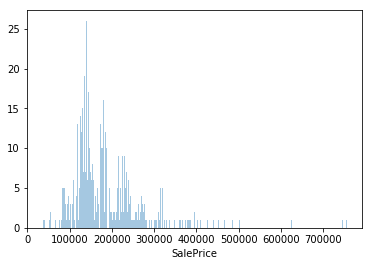

In [28]:
sns.distplot(houses['SalePrice'], kde=False, bins=1000)

Please describe the plot and answer the following questions:
- where is (roughly) the location of the global maximum of the distribution?
- is the data normally distributed? If not, do you have an idea how to transform the data that it follows a normal distribution?
- can you reason why the distribution looks like this?

Next, plot the distribution of the feature **'GrLivArea'** which describes the *above grade (ground) living area in square feet*. Play around with the options **kde** and **bins**. Describe the distribution.

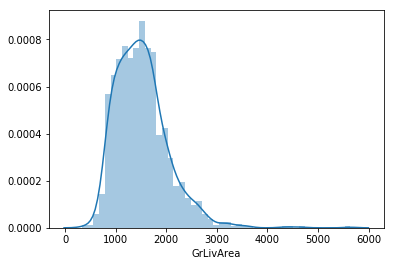

In [22]:
sns.distplot(houses['GrLivArea'])

Maybe there is a correlation between the target **'SalePrice'** and the feature **'GrLivArea'**. Let us create a scatter plot where we plot the feature **'GrLivArea'** on the **x-axis** and **'SalePrice'** on the **y-axis**.
In seaborn we can use the method **regplot()** which is actually a regression plot and allows us to fit the data already.

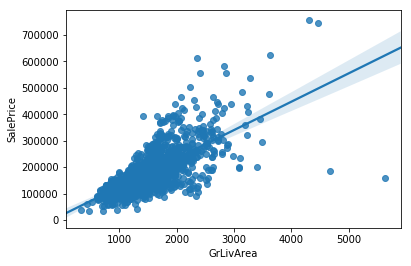

In [29]:
sns.regplot(x=, y=houses['Sal], data=houses)

Please, **describe the plot**.

Furthermore, we see a linear regression model fit with uncertainty bands. The translucent bands describe a bootstrap confidence interval generated for the estimate. We will talk about bootstrap roughly tomorrow.

In order to get the single distributions and the joint distribution combined in one plot we can use the **jointplot()** method from seaborn.
Please, use the method for the two attributes **'1stFlrSF'** (First Floor square feet) and **'SalePrice'**. First, produce the plot with the default function arguments. Second, change the argument **kind** once to **reg**, **hex** and **kde**.

Since most of the data points are located in the lower left corner, please try to plot only data points where **x < 3000** and **y < 500000**.

In [ ]:
# default


In [ ]:
# reg

In [ ]:
# hex

In [ ]:
# kde

Of course, we could have set the x and the y limits directly on the plot (using the matplotlib API) instead of using conditional indexing.

Would it have made any difference, e.g. for the regression plot? **Try to explain it**.

### 1.2 Heatmap
We have already seen that we have at least two good features to explain the target. What about the remaining ones? In order to make a quick check it is useful to compute the correlation matrix. Afterwards, the matrix can be represented as a heatmap.

First, **compute the correlation matrix** of the houses dataframe. Call the resulting dataframe/matrix **houses_corr**.

Next, use the function **sns.heatmap()** of the seaborn package and pass the correlation matrix as the only argument.

This does not look very nice and we have **redundant datapoints** (upper and lower triangles represent the same information). This can be solved by using a **mask matrix**.
Please execute the following statements, where we first compute a matrix which has the same shape as the corr matrix but contains only zeros. Afterwards, we fill the upper triangle of the mask matrix with the boolean value True. This can be done by using the numpy method np.triu_indices_from(mask). Finally, we can use the mask matrix and make further adjustments to get a nice heatmap of the correlation matrix.

In [ ]:
mask = np.zeros_like(houses_corr)
mask

In [ ]:
mask[np.triu_indices_from(mask)] = True
mask

In [ ]:
ax = sns.heatmap(houses_corr, mask=mask, cmap='coolwarm', linewidths=0.5, vmax=.8)

This looks much nicer. Please, **answer the following questions**:

- which features are highly correlated and anticorrelated?
- which features are highly correlated and anticorrelated with the target?
- if there is no correlaton between the feature and the target, does it mean that there is no dependence?

Of course, in real life data exploration does not end here. But due to the lack of time we have to move on and investigate another dataset.

## 2. Titanic Dataset

This is one of the most famous datasets for machine learning beginners. This dataset contains **passenger data from the titanic**. In one of the following exercises we try to build a classifier which allows us to predict if someone survived or died on the titanic. But first, let us explore the data.

Import the dataset **'data/titanic_new.csv'** and call the resulting dataframe **titanic**. Get familiar with the dataset by using the **info**, **describe** and **head** method.

In [ ]:
# Load data

In [ ]:
# info

In [ ]:
# describe

In [ ]:
# head

## 2.1 Countplots

Use the seaborn function **sns.countplot()** to visualize the number of survived and died passengers.
Set **data=titanic** and **x='Survived'**.

Ok, a lot of people died as we know it from history and movies. Let's see if there was a **difference in sex** regarding the number of died passengers.
Therefore, an easy option is the **hue** argument which we can set in several seaborn plotting methods. Please use **hue='Survived'** and **x='Sex'** in the **countplot** method.

Next, set **x** to **'Pclass'** and keep **hue='Survived'**.

This is as expected: a larger percentage of the first class passengers survived compared to the second and third class ones.

**Bonus**:

Create three different countplots, one for each class, and look at the different survival counts with respect to Sex.

### 2.2 Boxplots

Next, let's have a look at some distributions, but this time we use boxplots. Use the method **sns.boxplot()** and set **y** to the **'Age'** column and **x** to the **'Survived'** column. Afterwards, **describe what you see**.

Next, set **x** to **'Pclass'**.

The median of the age for the first class passengers is much higher (~40) than for the second (~30) and third (~25) class. 

Next, set **hue** once to **'Sex'** and once to **'Survived'**.

Please describe the distributions.

### This is the end of the exercise.

**Bonus:**

If you want, feel free to explore the dataset a bit more. You can try different visualization types with seaborn which are well documented here: https://seaborn.pydata.org/examples/index.html